$$
\newcommand{\L}{\mathcal{L}}
\newcommand{\p}{\partial}
$$

# `Материалы кафедры ММП факультета ВМК МГУ. Введение в глубокое обучение.`

# `Семинар 02. Введение в PyTorch`

### `Материалы составили Феоктистов Дмитрий (@trandelik),Находнов Максим (nakhodnov17@gmail.com)`

#### `Москва, Весенний семестр 2025`

О чём можно узнать из этого ноутбука:

* Базовый синтаксис и понятия библиотеки Pytorch

In [1]:
%config Completer.use_jedi = False # чтобы автодополнение с помощью табов работало
%load_ext autoreload
%autoreload 2

import torch
import numpy as np

In [2]:
seed = 42
torch.manual_seed(seed)
np.random.seed(seed)

## `Почему torch?`

Какие библиотеки для машинного обучения мы уже знаем? Есть `numpy/sklearn`, но так ли они удобны для глубокого обучения? Несмотря на наличие модуля `sklearn.neural_network`, пользоваться им не стоит. Почему?

1. Вы уже могли заметить, что дифференцировать функции руками это больно, поэтому каждый раз для своей нейронки писать backward самостоятельно не хотелось бы.
2. Нейронные сети - это матричные произведения. Очень много матричных произведений. И очень мало всего остального. 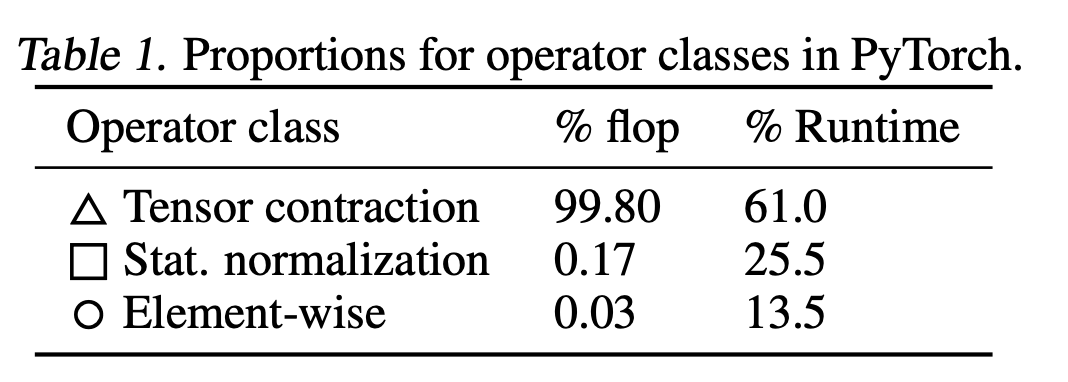

Матричные произведения - хорошо параллелизуемая операция, но CPU не очень хорошо масштабируется по FLOPS'ам чисто по физическим причинам (они греются так, что человечество не научилось достаточно быстро отводить тепло от них). Из-за чего так происходит? CPU - умная штука, она должна поддерживать много операций (вспомните курс ассемблера). А для матричного произведения нужна просто числодробилка, то есть довольно "тупая" вещь. Если вещь тупая, то она и масштабироваться будет лучше, а значит выполнять больше параллельных операций, а значит быстрее перемножать матрицы, а значит быстрее работать с нейронными сетями. Такой вещью является GPU/TPU/ASIC

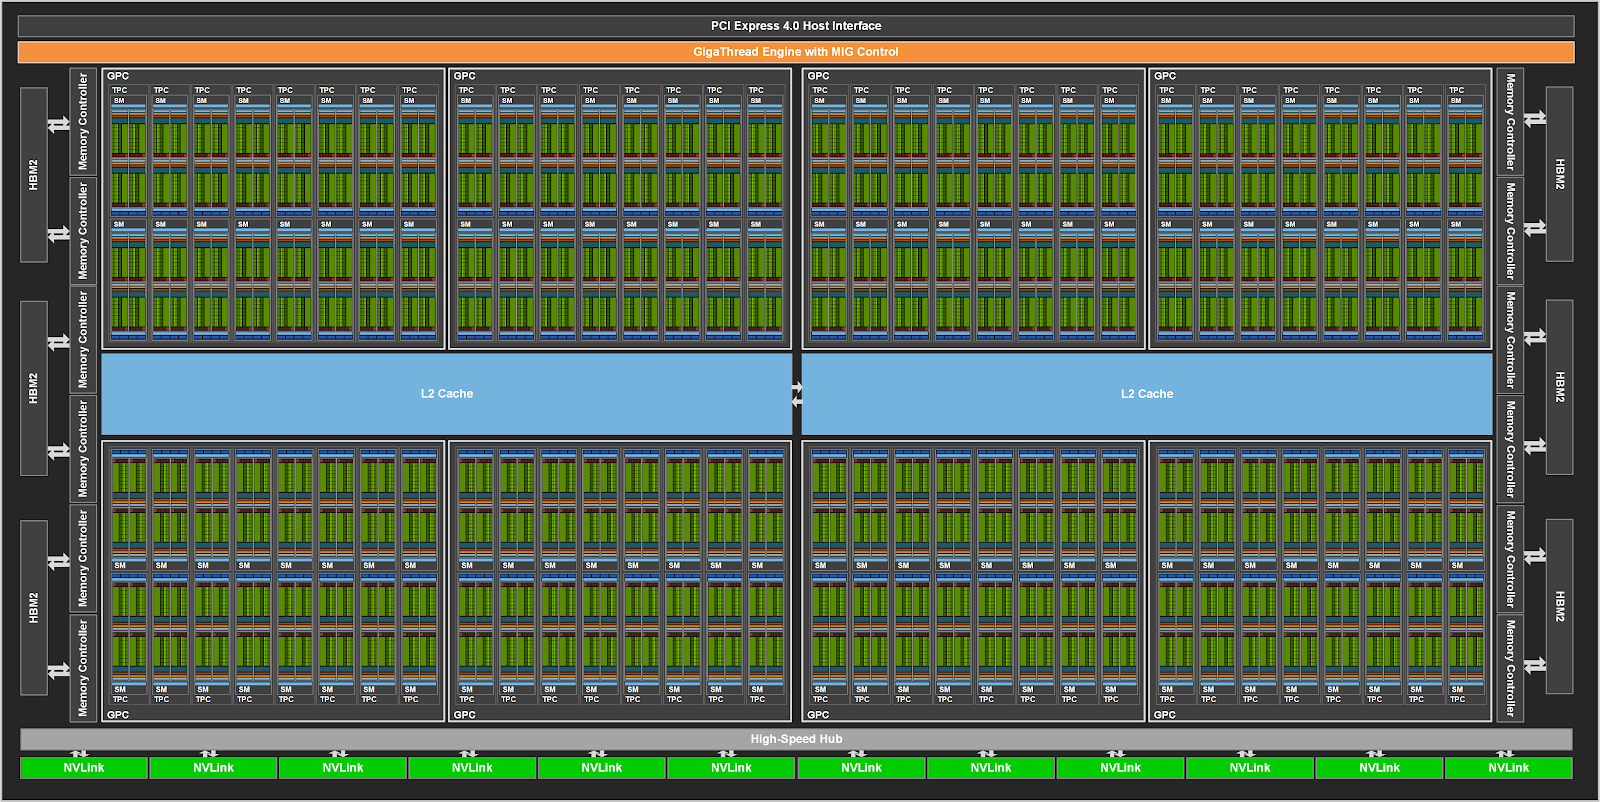



Итак, все эти хотелки содержит в себе `PyTorch`. Ключевые отличия от `numpy/sklearn`:
1. Поддерживает вычисления на **CPU/GPU/TPU**
2. **Автоматическое дифференцирование**

Основные методы обучения нейронных сетей являются методами оптимизации первого порядка. Они присутствуют, например, в пакете `scipy.optimize`, но либо считают градиенты численно, либо требуют внешних функций, предоставляющих им градиенты в требуемой точке. Написание таких функций вручную для каждой нейронной сети — задача решаемая, но достаточно бессмысленная, т.к. производные, даже аналитически, достаточно легко может считать и машина.

Концепция библиотеки `pytorch` — расширить функционал `numpy`, добавив туда возможность автоматического расчёта градиентов произвольных функций и их композиций, стараясь максимально сохранить привычную семантику.

Особенности:
1. **Синтаксически повторяет `numpy`/`scipy`**
2. Большой набор готовых компонент для реализации и обучения DL моделей
3. Для решения домен-спецефичных задач есть свои библиотеки
    * **`torchvision`**
    * `torchaudio`
    * ~~`torchtext`~~
    * `TorchData`
    * `TorchRec`
    * `TorchServe`
4. В конкурентной борьбе победил конкурентов в исследованиях и образовании
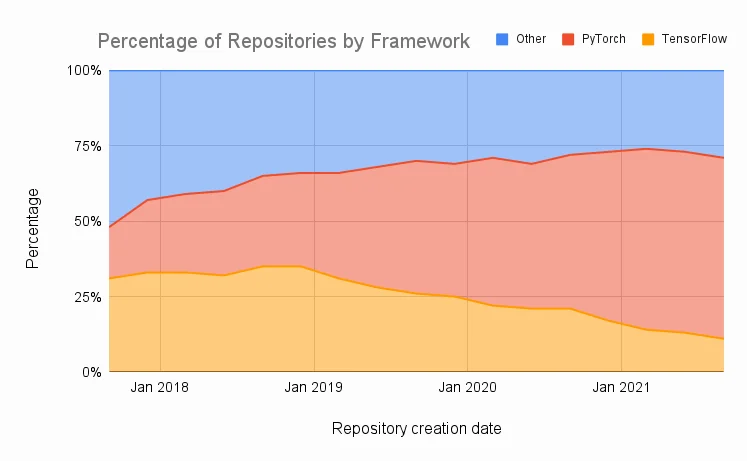

## `Общий обзор`

База:
* [torch.Tensor](https://pytorch.org/docs/stable/tensors.html)
* [Tensor Views](https://pytorch.org/docs/stable/tensor_view.html)                  
* [Tensor Attributes](https://pytorch.org/docs/stable/tensor_attributes.html)            
* [torch](https://pytorch.org/docs/stable/torch.html) — основные операции над тензорами
    * Tensors
        * Creation Ops
        * Indexing, Slicing, Joining, Mutating Ops
    * Generators
    * Random sampling
        * In-place random sampling
        * Quasi-random sampling
    * Serialization
    * Parallelism
    * Locally disabling gradient computation
    * Math operations
        * Pointwise Ops
        * Reduction Ops
        * Comparison Ops
        * Spectral Ops
        * Other Operations
        * BLAS and LAPACK Operations
    * Utilities
    * Operator Tags


* [torch.nn](https://pytorch.org/docs/stable/nn.html) — блоки-классы для DL моделей
    * Containers
    * Convolution Layers
    * Pooling layers
    * Padding Layers
    * Non-linear Activations (weighted sum, nonlinearity)
    * Non-linear Activations (other)
    * Normalization Layers
    * Recurrent Layers
    * Transformer Layers
    * Linear Layers
    * Dropout Layers
    * Sparse Layers
    * Distance Functions
    * Loss Functions
    * Vision Layers
    * Shuffle Layers
    * DataParallel Layers (multi-GPU, distributed)
    * Utilities
    * Quantized Functions
    * Lazy Modules Initialization
* [torch.nn.functional](https://pytorch.org/docs/stable/nn.functional.html) — блоки-функции для DL моделей в
* [torch.linalg](https://pytorch.org/docs/stable/linalg.html) — аналог `numpy.linalg`
* [torch.special](https://pytorch.org/docs/stable/special.html) — аналог `scipy.special`
* [torch.nn.init](https://pytorch.org/docs/stable/nn.init.html) — методы для инициализации весов      
* [torch.optim](https://pytorch.org/docs/stable/optim.html) — классы-оптимизаторы
* [torch.random](https://pytorch.org/docs/stable/random.html) — случайное семплирование     
* [torch.autograd](https://pytorch.org/docs/stable/autograd.html) — продвинутое дифференцирование
* [torch.hub](https://pytorch.org/docs/stable/hub.html) — предобученные модели
* [torch.fft](https://pytorch.org/docs/stable/fft.html) — аналог `scipy.fft`
* [torch.utils.tensorboard](https://pytorch.org/docs/stable/tensorboard.html) — логгирование в tensorboard            


Популярные модули:
* [torch.amp](https://pytorch.org/docs/stable/amp.html) — mixed precision training                
* [Complex Numbers](https://pytorch.org/docs/stable/complex_numbers.html) — комплексные числа
* [Quantization](https://pytorch.org/docs/stable/quantization.html) — квантизация
* [torch.distributions](https://pytorch.org/docs/stable/distributions.html) — классы для распределений с поддержкой дифференцирования (Reparameterization Trick/REINFORCE)


Вспомодательные модули:
* [torch.cuda](https://pytorch.org/docs/stable/cuda.html) — параметры и свойства вычисления на GPU
* [torch.backends](https://pytorch.org/docs/stable/backends.html) — параметры устройства для вычисления
* [torch.__config__](https://pytorch.org/docs/stable/config_mod.html) — текущая конфигурация


Распределённые вычисления:
* [torch.distributed](https://pytorch.org/docs/stable/distributed.html)                  
* [torch.distributed.algorithms.join](https://pytorch.org/docs/stable/distributed.algorithms.join.html)  
* [torch.distributed.elastic](https://pytorch.org/docs/stable/distributed.elastic.html)        
* [torch.distributed.fsdp](https://pytorch.org/docs/stable/fsdp.html)                         
* [torch.distributed.optim](https://pytorch.org/docs/stable/distributed.optim.html )           
* [DDP Communication Hooks](https://pytorch.org/docs/stable/ddp_comm_hooks.html)               
* [Pipeline Parallelism](https://pytorch.org/docs/stable/pipeline.html)  
* [Distributed RPC Framework](https://pytorch.org/docs/stable/rpc.html)                          


Для разработки расширений:
* [torch.library](https://pytorch.org/docs/stable/library.html)                      
* [torch.utils.cpp_extension](https://pytorch.org/docs/stable/cpp_extension.html)                


Разное:
* [torch.jit](https://pytorch.org/docs/stable/jit.html)                          
* [torch.futures](https://pytorch.org/docs/stable/futures.html)                      
* [torch.fx](https://pytorch.org/docs/stable/fx.html)                           
* [torch.monitor](https://pytorch.org/docs/stable/monitor.html)                      
* [torch.overrides](https://pytorch.org/docs/stable/torch.overrides.html)          
* [torch.package](https://pytorch.org/docs/stable/package.html)                      
* [torch.profiler](https://pytorch.org/docs/stable/profiler.html)                     
* [torch.onnx](https://pytorch.org/docs/stable/onnx.html)                                 
* [torch.masked](https://pytorch.org/docs/stable/masked.html)                       
* [torch.nested](https://pytorch.org/docs/stable/nested.html)                       
* [torch.sparse](https://pytorch.org/docs/stable/sparse.html)                       
* [torch.Storage](https://pytorch.org/docs/stable/storage.html)                      
* [torch.testing](https://pytorch.org/docs/stable/testing.html)                      
* [torch.utils.benchmark](https://pytorch.org/docs/stable/benchmark_utils.html)              
* [torch.utils.bottleneck](https://pytorch.org/docs/stable/bottleneck.html)                   
* [torch.utils.checkpoint](https://pytorch.org/docs/stable/checkpoint.html)                   
* [torch.utils.jit](https://pytorch.org/docs/stable/jit_utils.html)                    
* [torch.utils.dlpack](https://pytorch.org/docs/stable/dlpack.html)                       
* [torch.utils.mobile_optimizer](https://pytorch.org/docs/stable/mobile_optimizer.html)             
* [torch.utils.model_zoo](https://pytorch.org/docs/stable/model_zoo.html)                    
* [Type Info](https://pytorch.org/docs/stable/type_info.html)                    
* [Named Tensors](https://pytorch.org/docs/stable/named_tensor.html)                 
* [Named Tensors operator coverage](https://pytorch.org/docs/stable/name_inference.html)               

## `Базовые операции над тензорами`

Основной объект в pytorch — тензор (`torch.Tensor`), который является близким аналогом массива из numpy (`np.ndarray`).

In [ ]:
(
    torch.zeros([5, 7]),
    torch.ones([5, 7], dtype=torch.int32),
    torch.randn([5, 7])
)

(tensor([[0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0.]]),
 tensor([[1, 1, 1, 1, 1, 1, 1],
         [1, 1, 1, 1, 1, 1, 1],
         [1, 1, 1, 1, 1, 1, 1],
         [1, 1, 1, 1, 1, 1, 1],
         [1, 1, 1, 1, 1, 1, 1]], dtype=torch.int32),
 tensor([[ 1.9269,  1.4873,  0.9007, -2.1055,  0.6784, -1.2345, -0.0431],
         [-1.6047, -0.7521,  1.6487, -0.3925, -1.4036, -0.7279, -0.5594],
         [-0.7688,  0.7624,  1.6423, -0.1596, -0.4974,  1.7174,  0.3189],
         [-0.4245,  0.3057, -0.7746,  0.0349,  0.3211,  1.5736, -0.6011],
         [-1.2742,  2.1228, -1.2347, -0.4879, -1.4181,  0.8963,  0.0499]]))

Набор операций тоже очень схож:

In [ ]:
A, B = torch.randn(3, 5), torch.randn(5, 3)
A, A + B.T, A @ B, torch.sum(A), B.prod()

(tensor([[-0.7813,  0.2293, -1.2754, -1.9245,  0.4336],
         [ 0.6641, -0.4337, -0.4201, -0.9500, -1.0014],
         [-0.7719,  1.3434,  0.9560, -1.0110, -0.3568]]),
 tensor([[-0.0666,  0.7778, -1.4735,  0.6706,  0.8832],
         [ 0.4243, -0.8751,  0.5353,  1.8005, -0.6794],
         [-0.5556,  2.9249, -0.1342, -0.3623, -1.4071]]),
 tensor([[-4.9794, -6.2861, -0.1198],
         [-2.5956, -3.3044,  0.3512],
         [-2.7885, -2.3904,  0.6344]]),
 tensor(-5.2998),
 tensor(-0.0021))

Преобразование из torch в numpy:

In [ ]:
w = torch.tensor([1, 2, 3.0])
w_np = w.numpy()
type(w_np), w_np, type(w), w

(numpy.ndarray,
 array([1., 2., 3.], dtype=float32),
 torch.Tensor,
 tensor([1., 2., 3.]))

Преобразование из numpy в torch через копирование данных:

In [ ]:
v_np = np.arange(10)
v = torch.tensor(v_np)

v_np += 1

type(v_np), v_np, type(v), v

(numpy.ndarray,
 array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 torch.Tensor,
 tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]))

Преобразование из numpy в torch с общим буфером:

In [ ]:
u_np = np.full([2, 3], -1.0)
u = torch.from_numpy(u_np)

u_np += 10.0

type(u_np), u_np, type(u), u

(numpy.ndarray,
 array([[9., 9., 9.],
        [9., 9., 9.]]),
 torch.Tensor,
 tensor([[9., 9., 9.],
         [9., 9., 9.]], dtype=torch.float64))

Сравнение скорости:

In [ ]:
u_np = np.full([1000, 1000], 317.0)

In [ ]:
%timeit u = torch.from_numpy(u_np)

1.37 µs ± 414 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [ ]:
%timeit u = torch.tensor(u_np)

683 µs ± 35 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


Однако есть небольшие различия:
* `axis` -> `dim`: `np.sum(A, axis=0) -> torch.sum(A, dim=0)`
* `.reshape` -> `.view/.reshape`
* `.astype` -> `.to/.type`

Так же, есть возможность использовать inplace операции:

In [ ]:
A[1] += A[2]
A

tensor([[-0.7813,  0.2293, -1.2754, -1.9245,  0.4336],
        [-0.1078,  0.9097,  0.5358, -1.9610, -1.3582],
        [-0.7719,  1.3434,  0.9560, -1.0110, -0.3568]])

In [ ]:
A.zero_()
A

tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])

In [ ]:
torch.exp(A)
A.exp_()

tensor([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]])

При работе с тензорами в PyTorch нужно быть аккуратными при работе с различными типами данных

In [ ]:
A = torch.zeros(10, dtype=torch.float32)
B = torch.ones(10, dtype=torch.float64)
A + B

tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], dtype=torch.float64)

In [ ]:
A @ B

RuntimeError: dot : expected both vectors to have same dtype, but found Float and Double

In [ ]:
A.to(torch.float64) @ B

Полезные функции

* Сконкатенировать набор тензоров вдоль заданной размерности `torch.cat`
* Соединить тензоры одинаковой формы вдоль новой размерности `torch.stack`
* Добавить/убрать новую "единичную" размерность в тензор `torch.unsqueeze/torch.squeeze`
* Разбить тензор на заданное число блоков `torch.chunk`
* Переставить между собой две размерности `torch.transpose`
* Переставить местами все размерности `torch.permute`
* Повторить тензор `torch.tile/torch.repeat`
* Найти максимальный элемент (возвращает И положение, И значение) `torch.max`
* Поэлементный максимум между двумя тензорами `torch.maximum`
* "Выпрямить" тензор, объединив все размерности в одну `torch.ravel`
* Объединить только заданные размерности `torch.flatten`
* Вернуть k наибольших элементов `torch.topk`

#### `Первое ключевое отличие — возможность перемещения на GPU`

In [ ]:
a = torch.randn(3, 5)
a.dtype, a.device

(torch.float32, device(type='cpu'))

Проверим, что GPU доступна:

In [ ]:
torch.cuda.is_available()

True

In [ ]:
device = (
    torch.device('cuda', 0) # эквивалентно: torch.device('cuda:0') / 'cuda' / 'cuda:0'
    if torch.cuda.is_available()
    else torch.device('cpu')
)
device

device(type='cuda', index=0)

In [ ]:
a.to(device)

tensor([[ 0.0274, -0.7916, -0.5601, -0.9977, -0.9444],
        [-0.7357, -0.3638,  1.4364,  0.3744, -0.5670],
        [ 0.0394,  1.7093, -0.2127,  0.0452,  1.1154]], device='cuda:0')

Операции между тензорами на разных устройствах не возможны:

In [ ]:
a.cuda() + a

RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cuda:0 and cpu!

Обратите внимание, что при изменении device (c GPU на CPU и обратно происходит копирование):

In [ ]:
p_cpu = torch.rand(10)
p_gpu = p_cpu.to(device)

p_cpu -= 1
p_cpu, p_gpu

(tensor([-0.8670, -0.5863, -0.3956, -0.2419, -0.0963, -0.0445, -0.8965, -0.3742,
         -0.7151, -0.5548]),
 tensor([0.1330, 0.4137, 0.6044, 0.7581, 0.9037, 0.9555, 0.1035, 0.6258, 0.2849,
         0.4452], device='cuda:0'))

Сравним скорость работы типичного слоя нейронной сети - matmat + нелинейность на CPU и GPU

In [ ]:
def layer(A, B):
    C = A @ B
    C = C ** 2
    return C

In [ ]:
A = torch.randn([1000, 1000])
B = torch.randn([1000, 1000])

In [ ]:
%timeit _ = layer(A, B)

26 ms ± 2.09 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [ ]:
A_device, B_device = A.to(device), B.to(device)
%timeit _ = layer(A_device, B_device)

566 µs ± 9.33 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


Видим, что вычисления на GPU значительно быстрее вычислений на CPU, но мы не учли одну вещь - время копирования данных. Давайте сделаем более честный замер

In [ ]:
%timeit _ = layer(A.to(device), B.to(device))

2 ms ± 317 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


#### `Второе ключевое отличие — Autograd`

Все тензоры содержат атрибут `.grad`, который может хранить градиент по этому тензору.

In [ ]:
a.grad

По умолчанию, тензоры, создаваемые в pytorch, не будут требовать, чтобы для них посчитали градиент. Для этого надо добавить дополнительный аргумент `requires_grad=True`, либо вызвав метод `.requires_grad_()`.

In [ ]:
x = torch.tensor([1., 2., 3.], requires_grad=True)
y = torch.tensor([1., 2., 3.])
y.requires_grad_()

tensor([1., 2., 3.], requires_grad=True)

Производя операции с переменными, по которым нужно считать градиенты, мы конструируем граф вычислений:

In [ ]:
z = 3 * x**3 - y**2
z.requires_grad

True

В каждой переменной есть информация о том, как именно она была получена при проходе вперёд. Исходя из этой информации у тензоров в графе вычислений хранятся функции, которые должны быть вызваны на обратном проходе для расчёта градиента.

In [ ]:
z.grad_fn

Считать для каждого тензора якобиан целиком — сильно неоптимально. Вместо этого на всех промежуточных этапах autograd считает только произведения якобиан-вектор. В частности из-за этого, конечный тензор в графе всегда **должен быть скаляром**, что выполняется для всех функций потерь по определению.

Для примера сделаем из тензора `z` скаляр, сложив все его элементы, и посчитаем градиенты с помощью функции .backward()

In [ ]:
z.sum().backward()

In [ ]:
x.grad, y.grad

(tensor([ 9., 36., 81.]), tensor([-2., -4., -6.]))

Сравним с посчитанным вручную градиентом:

In [ ]:
torch.allclose(x.grad, 9 * x**2)

True

Однако, для оптимизации вычислений, градиенты не вычисляются в явном виде для промежуточных вершин графа

In [ ]:
z.grad

<ipython-input-80-1ee473f924b8>:1: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at aten/src/ATen/core/TensorBody.h:489.)
  z.grad


Если такое всё же нужно, требуется указать это явно с помощью вызова `.retain_grad()`

In [ ]:
x = torch.tensor([1., 2., 3.], requires_grad=True)
y = torch.tensor([1., 2., 3.])

z = 3 * x**3 - y**2
z.retain_grad()

z.sum().backward()
z.grad

tensor([1., 1., 1.])

#### `Визуализация графа вычислений`

Для примера визуализируем, как бы выглядел граф вычислений для линейной регресси.

Заметим, что пакет визуализации `pytorchviz` предназначен в первую очередь для визуализации нейронных сетей, поэтому нам необходимо будет использовать класс `torch.nn.Parameter`, который является обёрткой над тензором и несколько расширяет возможности аргумента `requires_grad=True`

Графы визуализируются библиотекой `graphviz`.

In [ ]:
# ! pip3 install torchviz

In [ ]:
from torchviz import make_dot

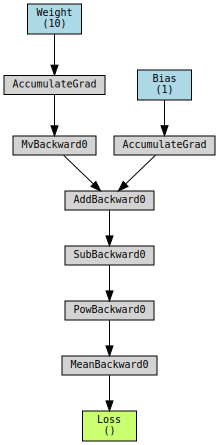

In [ ]:
X = torch.rand(5, 10)
y = torch.rand(5)

w = torch.nn.Parameter(torch.rand(10))
b = torch.nn.Parameter(torch.rand(1))

y_hat = X @ w + b

loss = torch.mean((y - y_hat)**2)
make_dot(loss, params={'Weight': w, 'Bias': b, 'Loss': loss})

Что можно сказать об этом графе вычислений?

* В листьях графа мы не видим тензора `X`, так как нам требуется расчёт градиента только по параметрам модели.
* `MvBackward0` соответствует матрично-векторному умножению (отсюда и первые буквы `Mv`) c матрицей `X`.
* `AddBackward0` соответствует добавлению смещения `b`, остальная часть графа — вычисление MSE.

#### `Зачем тогда уметь писать backward руками?`

На текущий момент не для всех функций поддерживается автоматическое дифференцирование. Раньше большой проблемой были комплексные числа, сейчас с их поддержкой стало лучше, однако, далеко не все функции до сих пор дифференцируемы. Просто убедимся, что такая проблема действительно есть, не вдаваясь в подробности, что это за функция

In [ ]:
module = torch.nn.Embedding(10, 10, dtype=torch.complex128)
x = torch.tensor([1, 2, 1, 3])
preds = module(x)
loss = torch.linalg.norm(preds)
loss.backward()

RuntimeError: embedding does not support automatic differentiation for outputs with complex dtype.

Рассмотрим интерфейс для реализации backpropagation в PyTorch. Отметим, что любая написанная руками функция встраивается в автоматический граф вычислений.

In [ ]:
class MySquare(torch.autograd.Function):
    """
    We can implement our own custom autograd Functions by subclassing
    torch.autograd.Function and implementing the forward and backward passes
    which operate on Tensors.
    """

    @staticmethod
    def forward(ctx, input):
        """
        In the forward pass we receive a Tensor containing the input and return
        a Tensor containing the output. ctx is a context object that can be used
        to stash information for backward computation. You can cache arbitrary
        objects for use in the backward pass using the ctx.save_for_backward method.
        """
        ctx.save_for_backward(input)
        return input ** 2

    @staticmethod
    def backward(ctx, grad_output):
        """
        In the backward pass we receive a Tensor containing the gradient of the loss
        with respect to the output, and we need to compute the gradient of the loss
        with respect to the input.
        """
        input, = ctx.saved_tensors
        grad_input = 2 * input * grad_output.clone()
        return grad_input

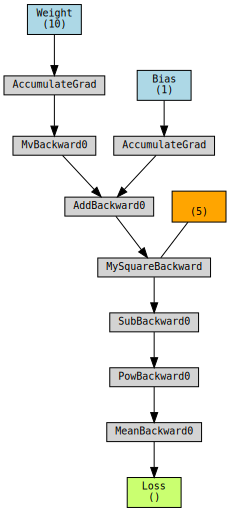

In [ ]:
X = torch.rand(5, 10)
y = torch.rand(5)

w = torch.nn.Parameter(torch.rand(10))
b = torch.nn.Parameter(torch.rand(1))

y_hat = X @ w + b
y_hat = MySquare.apply(y_hat)

loss = torch.mean((y - y_hat)**2)
make_dot(loss, params={'Weight': w, 'Bias': b, 'Loss': loss})

#### `Backward по отдельным параметрам`

Если мы внимательно посмотрим на аргументы функции `backward`, то можем заметить параметр `inputs`. Указав конкретные значения, мы можем ограничить список параметров по которым считается `backward`, то есть ускорить его и использовать меньше памяти. Такой подход может помочь, когда у вас в модели много параметров, но вам необходимо посчитать градиент по маленькому подмножеству, например, вы оптимизируете смещения в линейных слоях

In [ ]:
a = torch.tensor(1., requires_grad=True)
a.backward?

Так как мы хотим показать ускорение прохода назад по графу вычислений, то для этого необходимо создать действительно большой граф вычислений!

In [ ]:
d = 500
A = torch.rand(d, d).to(device).requires_grad_(True)
B = torch.rand(d, d).to(device).requires_grad_(True)
b = torch.tensor(1.).to(device).requires_grad_(True)
q = 0.9

def zero_grad(A, B, b):
    """
    set gradient to zeros
    """
    A.grad = None
    B.grad = None
    b.grad = None

def calc_loss(A, B, q, b, num_iters=2_000):

    C = A + A @ B + B

    for _ in range(num_iters):
        C = q * C + A @ B + b

    return torch.mean(C)

In [ ]:
# На всякий случай очистим память
torch.cuda.empty_cache()

loss = calc_loss(A, B, q, b)
loss

tensor(1256.6406, device='cuda:0', grad_fn=<MeanBackward0>)

Теперь самое главное, сделаем `backward`.

In [ ]:
%%time
loss.backward()

CPU times: user 322 ms, sys: 100 ms, total: 422 ms
Wall time: 461 ms


In [ ]:
torch.mean(A.grad), torch.mean(B.grad), b.grad

(tensor(0.0100, device='cuda:0'),
 tensor(0.0100, device='cuda:0'),
 tensor(10.0000, device='cuda:0'))

In [ ]:
zero_grad(A, B, b)

Работает действительно долго, но допустим нам не нужно знать градиенты по всем параметрам. Пусть мы сначала хотим оптимизировать по `A`, а уже потом по `B`

In [ ]:
# На всякий случай очистим память
torch.cuda.empty_cache()

loss = calc_loss(A, B, q, b)
loss

tensor(1256.6406, device='cuda:0', grad_fn=<MeanBackward0>)

In [ ]:
%%time
loss.backward(inputs=[A])

CPU times: user 177 ms, sys: 80.1 ms, total: 257 ms
Wall time: 257 ms


In [ ]:
torch.mean(A.grad), B.grad, b.grad

(tensor(0.0100, device='cuda:0'), None, None)

In [ ]:
zero_grad(A, B, b)

Стало быстрее примерно в 2 раза, так как мы считаем градиенты только для матрицы `A`. В нашем лоссе есть два равнозначных параметра: `A`, `B`. Допустим наша цель обновить одно число `b`, в нашем примере при подсчете градиента по `b` нет сложных вычислений, проверим это

In [ ]:
loss = calc_loss(A, B, q, b)
loss

tensor(1256.6406, device='cuda:0', grad_fn=<MeanBackward0>)

In [ ]:
%%time
loss.backward(inputs=[b])

CPU times: user 110 ms, sys: 0 ns, total: 110 ms
Wall time: 110 ms


In [ ]:
A.grad, B.grad, b.grad

(None, None, tensor(10.0000, device='cuda:0'))

Получилось еще быстрее! Если же мы укажем тензоры, которые не учавствовали в вычислении градиента, то обратный проход будет работать моментально

In [ ]:
loss = calc_loss(A, B, q, b)

In [ ]:
c = torch.rand(d, d).to(device).requires_grad_(True)

In [ ]:
%%time
loss.backward(inputs=[c])

CPU times: user 5.88 ms, sys: 987 µs, total: 6.86 ms
Wall time: 8.86 ms


#### `Аккумулирование градиентов`

Если не предпринимать никаких дополнительных действий, то множественный вызов `.backward()` будет не перезаписывать градиенты тензоров, а складывать их с уже существующим значением (сам граф вычислений каждый раз разрушается).

In [ ]:
x = torch.randn(3, 3, requires_grad=True)
y = torch.sum(x * x)
y.backward()

x.grad

tensor([[ 2.2654, -0.6819, -0.6727],
        [-2.5406, -1.4645,  0.4411],
        [-3.2970,  3.5109, -2.7664]])

In [ ]:
z = torch.sum(2 * x)
z.backward()

# Заметьте, что ко всем значениям прибавилось 2
x.grad

tensor([[ 4.2654,  1.3181,  1.3273],
        [-0.5406,  0.5355,  2.4411],
        [-1.2970,  5.5109, -0.7664]])

Чтобы считать градиент с нуля, достаточно удалить тензор.

In [ ]:
x.grad = None

А зачем такое может быть вообще надо? Рассмотрим задачу линейной регрессии. С большой матрицей, очень большой матрицей

In [ ]:
size = 100_000
dim = 4_000
X_master = torch.rand(size, dim)
y_master = torch.rand(size).to(device)

w = torch.nn.Parameter(torch.rand(dim)).to(device)
b = torch.nn.Parameter(torch.rand(1)).to(device)

In [ ]:
# На всякий случай очистим память
torch.cuda.empty_cache()

y_hat = X_master.to(device) @ w + b

loss = torch.mean((y_master - y_hat)**2)
loss.backward()

In [ ]:
!nvidia-smi

Mon Feb 17 07:55:18 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   43C    P0             25W /   70W |    1708MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
# На всякий случай очистим память
torch.cuda.empty_cache()

X = X_master[:X_master.shape[0] // 2]
y = y_master[:y_master.shape[0] // 2]

y_hat =  X.to(device) @ w + b

loss = torch.mean((y - y_hat)**2)
loss.backward()

In [ ]:
# На всякий случай очистим память
torch.cuda.empty_cache()

X = X_master[:X_master.shape[0] // 2]
y = y_master[:y_master.shape[0] // 2:]

y_hat =  X.to(device) @ w + b

loss = torch.mean((y - y_hat)**2)
loss.backward()

In [ ]:
!nvidia-smi

Mon Feb 17 07:55:25 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   43C    P0             25W /   70W |     946MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

Такое поведение может быть, например, нужно, чтобы посчитать градиент по батчу данных, который не влезает в память компьютера целиком, так как градиент модели аддитивен по входным данным. Также подобный подход используется в рекуррентных нейронных сетях, где к одному и тому же тензору весов нейросети происходит несколько обращений во время прямого прохода.


#### `Inplace операции`

По умолчанию, вызов `y = 2 * x` создаст новый тензор, в который скопирует значения `x`, умноженные на `2`. И есть большое желание провести данную операцию на месте, то есть без аллокации памяти. В nupmy это не имело бы никаких дополнительных последствий, но в pytorch нам надо помнить о графе вычислений, который должен быть без петель, а также может использовать тензоры, рассчитанные при прямом вычислении. В некоторых случаях библиотека может выполнить код и не ругнуться, но описание ситуаций, когда такое сработает, а когда нет, очень сложно, и потому сами разработчики не рекомендуют использовать in-place операции там, где необходим расчёт градиента.

In-place операции всегда имеют символ `_` на конце.

In [ ]:
x = torch.randn(3, 3, requires_grad=True)
y = 2 * x
z = y ** 2
# inplace operation!
y.exp_()
z.sum().backward()

RuntimeError: one of the variables needed for gradient computation has been modified by an inplace operation: [torch.FloatTensor [3, 3]], which is output 0 of ExpBackward0, is at version 1; expected version 0 instead. Hint: enable anomaly detection to find the operation that failed to compute its gradient, with torch.autograd.set_detect_anomaly(True).

Другой распространённый в numpy сценарий - маскированное изменение значений тензора. Это тоже является in-place операцией. В pytorch для этого лучше использовать функцию `torch.where`:

In [ ]:
x = torch.rand(3,3, requires_grad=True)
x

tensor([[0.2696, 0.4414, 0.2969],
        [0.8317, 0.1053, 0.2695],
        [0.3588, 0.1994, 0.5472]], requires_grad=True)

In [ ]:
x[x > 0.5] = 0

RuntimeError: a leaf Variable that requires grad is being used in an in-place operation.

In [ ]:
torch.where(x > 0.5, 0, x)

tensor([[0.2696, 0.4414, 0.2969],
        [0.0000, 0.1053, 0.2695],
        [0.3588, 0.1994, 0.0000]], grad_fn=<WhereBackward0>)

#### `Копирование тензоров`

В numpy существует интуитивно понятная функция `.copy()`, но в pytorch функции с таким названием нет! Это связано с тем, что тензоры в pytorch привязаны к графу вычислений, который надо также учитывать при копировании.

`.clone()` копирует тензор и сохраняет его привязку к текущему дереву вычислений:

In [ ]:
x = torch.rand(3, requires_grad=True)
y = x.clone()
y.requires_grad

True

`.detach()` исходя из своего названия, копирует лишь значения элементов тензора, отвязывая его от текущего графа вычислений:

In [ ]:
y = x.detach()
y.requires_grad

False

Очень часто при копировании градиентов недостаточно сделать только `.clone`, так как мы не хотим сохранять связь с графом вычислений. Например, если мы применим `.clone` к выходу нейросети, то добавим новое ребро в граф вычислений, что повличет накладные расходы. Кроме того, можно получить очень неожиданный эффекты если забывать про `.detach`

In [ ]:
# На всякий случай очистим память
torch.cuda.empty_cache()

In [ ]:
d = 4
x = torch.nn.Parameter(torch.rand(d, d, device=device))
x.grad

In [ ]:
z = x.clone() # Считаем, что это копия тензора, которая не связана с тензором x

y = z * 10
loss = y.sum()

loss.backward()

In [ ]:
x.grad # Все же связаны...

tensor([[10., 10., 10., 10.],
        [10., 10., 10., 10.],
        [10., 10., 10., 10.],
        [10., 10., 10., 10.]], device='cuda:0')

In [ ]:
z = x.detach().clone()

y = z * 10
loss = y.sum()

loss.backward()

RuntimeError: element 0 of tensors does not require grad and does not have a grad_fn

Продемонстрируем на графе вычислений эти как работает `.clone`, а как `.detach` операции:

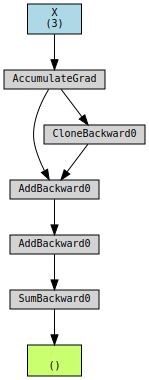

In [ ]:
x = torch.nn.Parameter(torch.rand(3))
y = torch.nn.Parameter(torch.rand(3))

z = torch.sum(x + x.clone() + y.detach())

make_dot(z, params={'X': x, 'Y': y})

Что можно понять из данного графа?

* Видна операция `CloneBackward0`, которая клонирует тензор `x`. Благодаря ей в сумме участвует как исходный тензор, так и его экспонированная версия.
* Во второй сумме мы не видим параметра `y`, потому что он входит в граф вычислений только через `.detach()`, что убирает проход градиентов.

#### `Продвинутое дифференцирование`

В модуле `autorgrad` есть набор функций для более сложных операций по подсчёту градиентов:

In [ ]:
X = torch.randn(5, 10)
w = torch.randn(10, requires_grad=True)

Например, подсчёт градиентов скалярной функции:

In [ ]:
torch.autograd.grad(torch.mean(X @ w), [w]), X.mean(dim=0)

((tensor([ 0.2753,  0.2636, -0.1600,  1.0619,  0.7041, -0.1018,  0.0872,  0.0534,
          -0.5048, -0.3353]),),
 tensor([ 0.2753,  0.2636, -0.1600,  1.0619,  0.7041, -0.1018,  0.0872,  0.0534,
         -0.5048, -0.3353]))

Вычисление произведения якобиана на вектор $vJ$, где $J = \nabla_{w} L(w) \in \mathbb{R}^{n \times d}, w \in \mathbb{R}^{d}, L(w)\in \mathbb{R}^{n}$

In [ ]:
v = torch.randn(5)
torch.autograd.grad(X @ w, [w], grad_outputs=v), v @ X

((tensor([ 1.4483,  0.1443,  1.0422,  0.4443, -0.9698,  2.4252,  0.3703, -0.6855,
          -1.7006,  2.0995]),),
 tensor([ 1.4483,  0.1443,  1.0422,  0.4443, -0.9698,  2.4252,  0.3703, -0.6855,
         -1.7006,  2.0995]))

Подсчёт градиентов по элементам в батче:

In [ ]:
# Экспериментальная фича
torch.autograd.grad(X @ w, [w], grad_outputs=(torch.eye(5), ), is_grads_batched=True), X

((tensor([[ 0.3057, -0.7746,  0.0349,  0.3211,  1.5736, -0.8455,  1.3123,  0.6872,
           -1.2347, -0.4879],
          [-1.4181,  0.8963,  0.0499,  2.2667,  1.1790, -0.4345, -0.8140, -0.7360,
           -0.8371, -0.9224],
          [ 1.8113,  0.1606,  0.3672,  0.1754, -1.1845,  1.3835, -1.2024,  0.7078,
           -1.0759,  0.5357],
          [ 1.1754,  0.5612, -1.0546,  1.2780,  0.7281, -0.7106, -0.6021,  0.9604,
            0.4048, -1.3543],
          [-0.4976,  0.4747, -0.1976,  1.2683,  1.2243,  0.0981,  1.7423, -1.3527,
            0.2191,  0.5526]]),),
 tensor([[ 0.3057, -0.7746,  0.0349,  0.3211,  1.5736, -0.8455,  1.3123,  0.6872,
          -1.2347, -0.4879],
         [-1.4181,  0.8963,  0.0499,  2.2667,  1.1790, -0.4345, -0.8140, -0.7360,
          -0.8371, -0.9224],
         [ 1.8113,  0.1606,  0.3672,  0.1754, -1.1845,  1.3835, -1.2024,  0.7078,
          -1.0759,  0.5357],
         [ 1.1754,  0.5612, -1.0546,  1.2780,  0.7281, -0.7106, -0.6021,  0.9604,
           0.404

In [ ]:
# Медленная альтернатива:

y = X @ w
torch.stack(([torch.autograd.grad(y[idx], w, retain_graph=True)[0] for idx in range(y.shape[0])])), X

(tensor([[ 0.3057, -0.7746,  0.0349,  0.3211,  1.5736, -0.8455,  1.3123,  0.6872,
          -1.2347, -0.4879],
         [-1.4181,  0.8963,  0.0499,  2.2667,  1.1790, -0.4345, -0.8140, -0.7360,
          -0.8371, -0.9224],
         [ 1.8113,  0.1606,  0.3672,  0.1754, -1.1845,  1.3835, -1.2024,  0.7078,
          -1.0759,  0.5357],
         [ 1.1754,  0.5612, -1.0546,  1.2780,  0.7281, -0.7106, -0.6021,  0.9604,
           0.4048, -1.3543],
         [-0.4976,  0.4747, -0.1976,  1.2683,  1.2243,  0.0981,  1.7423, -1.3527,
           0.2191,  0.5526]]),
 tensor([[ 0.3057, -0.7746,  0.0349,  0.3211,  1.5736, -0.8455,  1.3123,  0.6872,
          -1.2347, -0.4879],
         [-1.4181,  0.8963,  0.0499,  2.2667,  1.1790, -0.4345, -0.8140, -0.7360,
          -0.8371, -0.9224],
         [ 1.8113,  0.1606,  0.3672,  0.1754, -1.1845,  1.3835, -1.2024,  0.7078,
          -1.0759,  0.5357],
         [ 1.1754,  0.5612, -1.0546,  1.2780,  0.7281, -0.7106, -0.6021,  0.9604,
           0.4048, -1.3543],

Обратите внимание, что в предыдущем примере проход через один и тот же граф вычислений делается несколько раз. По умолчанию, после первого прохода граф уничтожается. Чтобы этого избежать используйте `retain_graph=True`

Подсчёт вторых производных:

In [ ]:
S = w @ X.T @ X @ w

# Подсчёт в два шага. Для создания графа вычислений вторых производных используется параметр create_graph=True:

[grad] = torch.autograd.grad(S, w, create_graph=True)
print(torch.linalg.norm(grad - 2 * X.T @ X @ w))

[hessian] = torch.autograd.grad(grad, w, grad_outputs=(torch.eye(w.shape[0]), ), is_grads_batched=True)
print(torch.linalg.norm(hessian - 2 * X.T @ X))

# Подсчёт в функциональном виде:

hessian_func = torch.autograd.functional.hessian(
    lambda w: w @ X.T @ X @ w, w
)
print(torch.linalg.norm(hessian - hessian_func))

tensor(9.2326e-06, grad_fn=<LinalgVectorNormBackward0>)
tensor(0.)
tensor(0.)


#### `Менеджеры контекста`

Поведением градиента сразу группы тензоров можно управлять с помощью специальных функций, которые вызываются через стандартную семантику питона `with foo():`, где `foo` — одна из трёх функций ниже:

**Default Mode**

Стандартный режим работы pytorch, в котором управление градиентами происходит через requires_grad. Явно его нужно вызывать только внутри других контекстных менеджеров, чтобы временно снова активировать расчёт градиентов (что случается крайне редко) вызовом `torch.enable_grad()`.

**No grad mode**

Данный режим используется когда блока кода нет необходимости вычислять градиенты, что занимает как вычислительные ресурсы, так и дополнительную память. Реализуется вызовом `torch.no_grad()`.

**Inference mode**

Аналогично No grad mode отключает расчёт градиентов, но кроме того проводит дополнительные оптимизации, что делает вычисления внутри блока кода ещё быстрее. Однако, тензоры, созданные в таком блоке будет невозможно использовать совместно с тензорами, для которых расчёт градиента необходим. Реализуется вызовом `torch.inference_mode()`.

In [ ]:
x = torch.rand(3, requires_grad=True)

with torch.no_grad():
    y = x + x

y.requires_grad

False

In [ ]:
@torch.no_grad()
def foo(x):
    return x + 2

y = foo(x)
y.requires_grad

False

#### `.item`

Часто при подсчёте метрик возникают тензоры из одного элемента/скаляры, которые могут находится на GPU или быть частью графа вычислений.

In [ ]:
torch.cuda.empty_cache()

w = torch.randn(10000, requires_grad=True).to(device)

losses = []
for i in range(50):
    x = torch.randn((10000, 10000)).to(device)
    loss = torch.linalg.norm(x @ w)
    losses.append(loss)
    print(f"Сейчас занято {torch.cuda.memory_allocated() // 1024 // 1024} MB")

Сейчас занято 417 MB
Сейчас занято 799 MB
Сейчас занято 1181 MB
Сейчас занято 1564 MB
Сейчас занято 1946 MB
Сейчас занято 2328 MB
Сейчас занято 2710 MB
Сейчас занято 3092 MB
Сейчас занято 3474 MB
Сейчас занято 3856 MB
Сейчас занято 4238 MB
Сейчас занято 4620 MB
Сейчас занято 5002 MB
Сейчас занято 5384 MB
Сейчас занято 5766 MB
Сейчас занято 6148 MB
Сейчас занято 6530 MB
Сейчас занято 6912 MB
Сейчас занято 7294 MB
Сейчас занято 7676 MB
Сейчас занято 8058 MB
Сейчас занято 8440 MB
Сейчас занято 8822 MB
Сейчас занято 9204 MB
Сейчас занято 9586 MB
Сейчас занято 9968 MB
Сейчас занято 10350 MB
Сейчас занято 10732 MB
Сейчас занято 11114 MB
Сейчас занято 11497 MB
Сейчас занято 11879 MB
Сейчас занято 12261 MB
Сейчас занято 12643 MB
Сейчас занято 13025 MB
Сейчас занято 13407 MB
Сейчас занято 13789 MB
Сейчас занято 14171 MB
Сейчас занято 14553 MB
Сейчас занято 14935 MB


OutOfMemoryError: CUDA out of memory. Tried to allocate 382.00 MiB. GPU 0 has a total capacity of 14.74 GiB of which 14.12 MiB is free. Process 16579 has 14.72 GiB memory in use. Of the allocated memory 14.59 GiB is allocated by PyTorch, and 8.62 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)


Сохранение таких тензоров в массив приведёт к утечке памяти. Чтобы этого избежать существует возможность трансформирования таких тензоров в Python скаляр:

In [ ]:
torch.cuda.empty_cache()

w = torch.randn(10000, requires_grad=True).to(device)

losses = []
for i in range(50):
    x = torch.randn((10000, 10000)).to(device)
    loss = torch.linalg.norm(x @ w)
    losses.append(loss.item())
    print(f"Сейчас занято {torch.cuda.memory_allocated() // 1024 // 1024} MB")

Сейчас занято 799 MB
Сейчас занято 799 MB
Сейчас занято 799 MB
Сейчас занято 799 MB
Сейчас занято 799 MB
Сейчас занято 799 MB
Сейчас занято 799 MB
Сейчас занято 799 MB
Сейчас занято 799 MB
Сейчас занято 799 MB
Сейчас занято 799 MB
Сейчас занято 799 MB
Сейчас занято 799 MB
Сейчас занято 799 MB
Сейчас занято 799 MB
Сейчас занято 799 MB
Сейчас занято 799 MB
Сейчас занято 799 MB
Сейчас занято 799 MB
Сейчас занято 799 MB
Сейчас занято 799 MB
Сейчас занято 799 MB
Сейчас занято 799 MB
Сейчас занято 799 MB
Сейчас занято 799 MB
Сейчас занято 799 MB
Сейчас занято 799 MB
Сейчас занято 799 MB
Сейчас занято 799 MB
Сейчас занято 799 MB
Сейчас занято 799 MB
Сейчас занято 799 MB
Сейчас занято 799 MB
Сейчас занято 799 MB
Сейчас занято 799 MB
Сейчас занято 799 MB
Сейчас занято 799 MB
Сейчас занято 799 MB
Сейчас занято 799 MB
Сейчас занято 799 MB
Сейчас занято 799 MB
Сейчас занято 799 MB
Сейчас занято 799 MB
Сейчас занято 799 MB
Сейчас занято 799 MB
Сейчас занято 799 MB
Сейчас занято 799 MB
Сейчас занято

## `Оптимизация в PyTorch`

Теперь мы знаем, как считать в PyTorch градиенты, а еще мы знаем, что для обучения нейронных сетей нужно решать задачу оптимизации. Давайте научимся решать оптимизационную задачу на PyTorch, а уже в следующий раз разберем, как именно решать оптимизационную задачу для обучения

In [ ]:
def rosenbrock(x, a=1, b=100):
    return torch.sum((a - x[:-1]) ** 2 + b * (x[1:] - x[:-1] ** 2) ** 2)

Это функция Розенброка, на ней часто тестируют методы оптимизации, ее глобальный оптимум - вектор из всех единиц

In [ ]:
num_iters = 10000
dim = 5

x = torch.full((dim, ), 1/ dim, requires_grad=True)
lr = 3e-4

values = []

for i in range(num_iters):
    value = rosenbrock(x)
    value.backward()

    with torch.no_grad():
        x.data = x.data - lr * x.grad
    x.grad = None
    values.append(value.item())

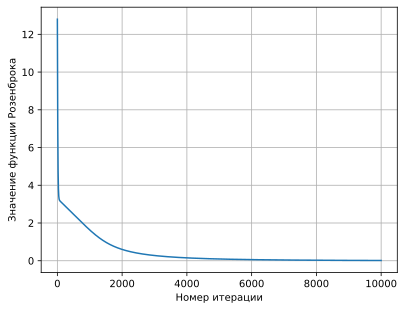

In [ ]:
import matplotlib.pyplot as plt
%config InlineBackend.figure_formats = ['svg']


plt.plot(torch.arange(num_iters), values)
plt.grid(True)
plt.xlabel('Номер итерации')
plt.ylabel('Значение функции Розенброка')
plt.show()

In [ ]:
x

tensor([0.9875, 0.9752, 0.9509, 0.9039, 0.8165], requires_grad=True)

А что если нам понадобится написать сложный оптимизатор, хотя бы Адам? Придется все делать руками? А если параметров много? То плодить циклы? К счастью, нет, в PyTorch есть отдельный модуль, который отвечает за оптимизаторы. Посмотрим, как работать с ними

In [ ]:
from torch import optim

In [ ]:
x = torch.full((dim, ), 1/ dim, requires_grad=True)
optimizer = optim.SGD([x], lr=lr)

values_pt = []

for i in range(num_iters):
    value = rosenbrock(x)
    value.backward()
    optimizer.step()
    optimizer.zero_grad()
    values_pt.append(value.item())

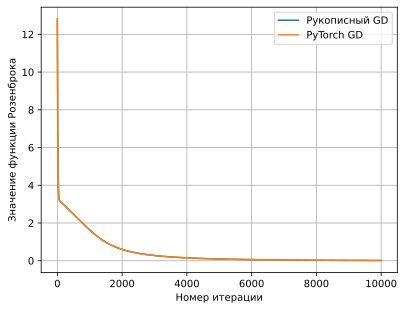

In [ ]:
plt.plot(torch.arange(num_iters), values, label='Рукописный GD')
plt.plot(torch.arange(num_iters), values_pt, label='PyTorch GD')
plt.grid(True)
plt.xlabel('Номер итерации')
plt.ylabel('Значение функции Розенброка')
plt.legend()
plt.show()

In [ ]:
x = torch.full((dim, ), 1/ dim, requires_grad=True)
optimizer = optim.Adam([x], lr=lr)

values_adam = []

for i in range(num_iters):
    value = rosenbrock(x)
    value.backward()
    optimizer.step()
    optimizer.zero_grad()
    values_adam.append(value.item())

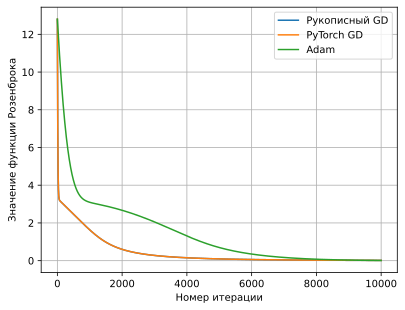

In [ ]:
plt.plot(torch.arange(num_iters), values, label='Рукописный GD')
plt.plot(torch.arange(num_iters), values_pt, label='PyTorch GD')
plt.plot(torch.arange(num_iters), values_adam, label='Adam')
plt.grid(True)
plt.xlabel('Номер итерации')
plt.ylabel('Значение функции Розенброка')
plt.legend()
plt.show()

Однако `torch.optim` содержит далеко не все оптимизаторы, и это может быть неприятно. Как тогда написать свой?

In [ ]:
class Signum(optim.Optimizer):
    def __init__(self, params, lr=0.01, momentum=0.09, weight_decay=0, **kwargs):
        defaults = dict(lr=lr, momentum=momentum, weight_decay=weight_decay)

        super(Signum, self).__init__(params, defaults)

    def __setstate__(self, state):
        super(Signum, self).__setstate__(state)

    def step(self, closure=None):

        loss = None
        if closure is not None:
            loss = closure()

        for group in self.param_groups:
            weight_decay = group['weight_decay']
            momentum = group['momentum']

            for p in group['params']:
                if p.grad is None:
                    continue
                d_p = p.grad.data
                if weight_decay != 0:
                    d_p.add_(p.data, alpha=weight_decay)
                if momentum != 0:
                    # signum
                    param_state = self.state[p]
                    if 'momentum_buffer' not in param_state:
                        buf = param_state['momentum_buffer'] = torch.zeros_like(p.data)

                    else:
                        buf = param_state['momentum_buffer']

                    buf.mul_(momentum).add_(d_p, alpha=(1 - momentum))
                    d_p = torch.sign(buf)
                else:#signsgd
                    d_p = torch.sign(d_p)

                p.data.add_(d_p, alpha=-group['lr'])

        return loss

In [ ]:
x = torch.full((dim, ), 1/ dim, requires_grad=True)
optimizer = Signum([x], lr=lr)

values_signum = []

for i in range(num_iters):
    value = rosenbrock(x)
    value.backward()
    optimizer.step()
    optimizer.zero_grad()
    values_signum.append(value.item())

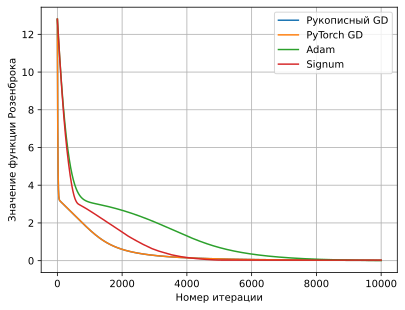

In [ ]:
plt.plot(torch.arange(num_iters), values, label='Рукописный GD')
plt.plot(torch.arange(num_iters), values_pt, label='PyTorch GD')
plt.plot(torch.arange(num_iters), values_adam, label='Adam')
plt.plot(torch.arange(num_iters), values_signum, label='Signum')
plt.grid(True)
plt.xlabel('Номер итерации')
plt.ylabel('Значение функции Розенброка')
plt.legend()
plt.show()

Вы могли заметить, что мы везде для получения `lr` и `momentum` использовали group. Зачем такое может быть нужно? Это дает возможность разбить параметры вашей модели на группы и использовать разные параметры оптимизатора для каждого из тензоров. Иногда это может помочь лучше обучить модель. Разберем игрушечный пример.

In [ ]:
x = torch.full((dim, ), 1/ dim, requires_grad=True)
z = torch.full((dim, ), 0.2/ dim, requires_grad=True)
optimizer = optim.SGD([x, z], lr=lr)

values = []

for i in range(num_iters):
    value = rosenbrock(x * z ** 2)
    value.backward()
    optimizer.step()
    optimizer.zero_grad()
    values.append(value.item())

print(f"Минимальное найденное значение псевдо функции Розенброка: {min(values)}")

Минимальное найденное значение псевдо функции Розенброка: 3.4251976013183594


In [ ]:
x = torch.full((dim, ), 1/ dim, requires_grad=True)
z = torch.full((dim, ), 0.2/ dim, requires_grad=True)
optimizer = optim.SGD([
    {'params': x},
    {'params': z, 'lr': 1e-3}
], lr=lr)

values = []

for i in range(num_iters):
    value = rosenbrock(x * z ** 2)
    value.backward()
    optimizer.step()
    optimizer.zero_grad()
    values.append(value.item())

print(f"Минимальное найденное значение псевдо функции Розенброка: {min(values)}")

Минимальное найденное значение псевдо функции Розенброка: 1.1358027458190918


Ну и наконец, осталось разобрать, что же такое `closure`. Тут все просто - некоторые методы могут хотеть считать градиент не в той точке, в которой находится модель сейчас, или же считать их несколько раз за итерацию. Для обеспечения подобной возможности и используется `closure` - она просто считает градиенты модели (в текущем батче). Также вы можете туда положить какую-то свою логику. То есть это просто инструмент для обеспечения гибкости

In [ ]:
x = torch.full((dim, ), 1/ dim, requires_grad=True)
optimizer = optim.SGD([x], lr=lr)

values = []

for i in range(num_iters):
    def closure():
        optimizer.zero_grad()
        value = rosenbrock(x)
        value.backward()
        return value
    value = optimizer.step(closure)
    values.append(value.item())

print(f"Минимальное найденное значение функции Розенброка: {min(values)}")

Минимальное найденное значение функции Розенброка: 0.012463781051337719


## `Некоторые подводные камни`

### `Иногда broadcasting это зло`

Сейчас мы рассмотрим довольно распространенную ошибку при обучении моделей с кастомным лоссом. Библиотечные реализации сообщают о том, что вы вероятно делаете не то, что хотите, но иногда приходится пользоваться не только ими. Более того, такая ошибка может выстрелить в самый неожиданный момент. Типичная история:

In [ ]:
W = torch.randn((10, 1), requires_grad=True) # последний слой нейросети, размерность на выходе должна быть 1
x = torch.randn((20, 10)) # входные данные (batch_size, dim)
y = torch.randn(20) # таргеты
preds = x @ W
loss = torch.linalg.norm(preds - y)

А теперь смотрим внимательнее:

In [ ]:
W = torch.randn((10, 1), requires_grad=True) # последний слой нейросети, размерность на выходе должна быть 1
x = torch.randn((20, 10)) # входные данные (batch_size, dim)
y = torch.randn(20) # таргеты
preds = x @ W
print(f'Predictions shape: {preds.shape}')
diff = preds - y
print(f'Difference shape: {diff.shape}')
loss = torch.linalg.norm(diff)

Predictions shape: torch.Size([20, 1])
Difference shape: torch.Size([20, 20])


Пу-пу-пу, сейчас бы обучились... К счастью, это фиксится легко, нужно просто помнить, какую задачу вы решаете и понимать, какая размерность должна быть на выходе

In [ ]:
W = torch.randn((10, 1), requires_grad=True) # последний слой нейросети, размерность на выходе должна быть 1
x = torch.randn((20, 10)) # входные данные (batch_size, dim)
y = torch.randn(20) # таргеты
preds = x @ W
preds = preds.flatten()
print(f'Predictions shape: {preds.shape}')
diff = preds - y
print(f'Difference shape: {diff.shape}')
loss = torch.linalg.norm(diff)

Predictions shape: torch.Size([20])
Difference shape: torch.Size([20])


### `Аккуратнее с флотами`

In [ ]:
x = torch.randn(1, 3, 10, 10)
x[0, 0, 0, 0] = torch.log(torch.tensor([-1.])) # -1 могла придти откуда угодно

m = torch.nn.Conv2d(3, 6, 3, 1, 1)
output = m(x)
print(output[0, 0, 0:3, 0:3])

tensor([[    nan,     nan,  0.0872],
        [    nan,     nan, -0.0347],
        [ 0.5118,  0.0152, -0.2469]], grad_fn=<SliceBackward0>)


In [ ]:
loss = output.sum()
loss.backward()

Оно не упало, не выругалось, а посчитала градиенты с nan. А это значит, что ваше обучение развалится

In [ ]:
print(f'Количество nan в градиенте: {torch.isnan(m.weight.grad).sum().item()}')

Количество nan в градиенте: 24


Рассмотрим типичные ситуации возникновения нанов/инфов и прочих неприятных персонажий

In [ ]:
x = torch.tensor([0.0], requires_grad=True) # 0 тут пришел откуда-то до, где все логично!
y = 1.0 / x
y.backward()
print(x.grad)

tensor([-inf])


In [ ]:
x = torch.tensor([0.0], requires_grad=True)
y = torch.log(x)
y.backward()
print(x.grad)

tensor([inf])


In [ ]:
x = torch.tensor([1000.0], requires_grad=True)
y = torch.exp(x)
y.backward()
print(x.grad)

tensor([inf])


In [ ]:
print(x.grad + torch.inf)

tensor([inf])


### `Как положить кластер`

In [ ]:
x = torch.randn([1000, 3, 100, 100])

In [ ]:
torch.save(x, 'full.pt')

In [ ]:
!ls full.pt -lh

-rw-rw-r-- 1 alexandr alexandr 115M фев 17 01:07 full.pt


In [ ]:
torch.save(x[0], 'sample.pt')

In [ ]:
!ls sample.pt -lh

-rw-rw-r-- 1 alexandr alexandr 115M фев 17 01:07 sample.pt


Но подождите, мы же сохраняли всего одну картинку... Как так вышло? Индексация создала view на тензор, а не действительно скопировала ее. То есть мы все еще сохраняли все картинки

In [ ]:
torch.save(x[0].clone(), 'real_sample.pt')

In [ ]:
!ls real_sample.pt -lh

-rw-rw-r-- 1 alexandr alexandr 119K фев 17 01:07 real_sample.pt


А теперь представьте, что мы учим какую-то модельку, и решили изучить, как меняются активации от итерации. Для этого каждый раз мы сохраняем всего одну картинку. Написали сохранение, запустили, оно даже работает, радостно пошли спать. А утром нас ждет сюрприз

## `Forward-mode Automatic Differentiation`

Как мы разбирали на лекции, существует Forward AD, которое не так распространено в нейронных сетях, но может быть полезно для подсчета производных, когда выходов больше, чем входов, что может быть полезно в некоторых ситуациях. В PyTorch есть поддержка этого способа дифференцирования через Jacobian-vector product. Интерфейс очень похож на `.grad()`, однако требует задавать направление, вдоль которого требуется найти производную (`tangent` вектор или vector в `Jacobian-vector product`)

In [ ]:
from torch.autograd.functional import jvp


def function(x):
    return x ** 2

x = torch.tensor([2.0], requires_grad=True)

tangent = torch.tensor([1.0])

y, jvp_value = jvp(function, (x,), (tangent,))

print("Значение функции:", y)
print("Производная (JVP):", jvp_value)

Значение функции: tensor([4.])
Производная (JVP): tensor([4.])


In [ ]:
def function(x):
    a = torch.tensor([1, 2], device=x.device, dtype=x.dtype)
    return x * a

x = torch.tensor([2.0], requires_grad=True)

tangent = torch.tensor([1.0])

y, jvp_value = jvp(function, (x,), (tangent,))

print("Значение функции:", y)
print("Производная (JVP):", jvp_value)

Значение функции: tensor([2., 4.])
Производная (JVP): tensor([1., 2.])


In [ ]:
def function(x):
    return x[0]**2 + x[1]**3

x = torch.tensor([2.0, 3.0], requires_grad=True)

tangent = torch.tensor([1.0, 0.0])

y, vjp_value = jvp(function, (x,), (tangent,))

print("Значение функции:", y)
print("Производная (JVP) в направлении v:", vjp_value)

Значение функции: tensor(31.)
Производная (JVP) в направлении v: tensor(4.)


In [ ]:
def function(x):
    return x[0]**2 + x[1]**3

x = torch.tensor([2.0, 3.0], requires_grad=True)

tangent = torch.tensor([0.0, 1.0])

y, vjp_value = jvp(function, (x,), (tangent,))

print("Значение функции:", y)
print("Производная (JVP) в направлении v:", vjp_value)

Значение функции: tensor(31.)
Производная (JVP) в направлении v: tensor(27.)


In [ ]:
def function(x):
    return x[0]**2 + x[1]**3

x = torch.tensor([2.0, 3.0], requires_grad=True)

tangent = torch.tensor([1.0, 1.0])

y, vjp_value = jvp(function, (x,), (tangent,))

print("Значение функции:", y)
print("Производная (JVP) в направлении v:", vjp_value)

Значение функции: tensor(31.)
Производная (JVP) в направлении v: tensor(31.)


## `Построение нейронных сетей`

Для обучения нейронной сети необходимо определить ее структуру (архитектуру). Чаще всего модели собираются из заранее реализованных блоков, как конструктор. В этой секции мы посмотрим на основные блоки и как из них собирать модели.

### `torch.nn.Module`

Для того, чтобы реализовать свой блок, нужно, чтобы он был отнаследован от базового класса для всех нейронных сетей `torch.nn.Module`. 

Затем, для удобства и в соответствии с общепринятой практикой, модуль должен реализовывать функцию `forward`.  В этой функции обычно реализуют основную логику вычислений в модуле, так называемый *прямой проход* через слой. Pytorch использует функцию `forward` для переопределения магического метода класса `__call__`, что позволяет использовать следующий синтаксический сахар для вычисления прямого прохода:
```python
# Два эквивалентных способа делать прямой проход через блок:
out = module(x)
out = module.forward(x)
```

Нужно отметить, что блоки являются лишь удобной обёрткой для вычислений и создания графа автоматического дифференцирования.

Рассмотрим простейший пример модуля, который реализует **Тождественное преобразование**:

In [3]:
class Identity(torch.nn.Module):
    def __init__(self):
        '''
        Конструктор блока. Здесь обычно создают обучаемые параметры и сохраняют переменные, 
            определяющие глобальное состояние слоя, а так же гиперпараметры
        Блок, может содержать в себе подблоки, которые также были отнаследованы от базового класса torch.nn.Module
        '''
        # Необходимо вызвать конструктор базового класса для корректной работы блока
        super().__init__()
        
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        '''
        Функция, реализующая прямой проход через слой. В процессе вычислений создаётся граф вычислений
            сквозь который выполняется автоматическое дифференцирование.
        '''
        return x
    
    def __repr__(self):
        '''
        Хорошей практикой является переопределение строкового представления для блоков
        Обычно, помимо названия класса также выводят гиперпараметры данного экземпляра класса
        '''
        return 'Identity()'

In [4]:
identity_layer = Identity()
x = torch.randn([3, 5])

# Обратите внимание, метод __call__ был автоматически переопределён через вызов метода forward
print(x, identity_layer(x), sep='\n')
print(identity_layer, torch.equal(x, identity_layer(x)))

tensor([[ 0.3367,  0.1288,  0.2345,  0.2303, -1.1229],
        [-0.1863,  2.2082, -0.6380,  0.4617,  0.2674],
        [ 0.5349,  0.8094,  1.1103, -1.6898, -0.9890]])
tensor([[ 0.3367,  0.1288,  0.2345,  0.2303, -1.1229],
        [-0.1863,  2.2082, -0.6380,  0.4617,  0.2674],
        [ 0.5349,  0.8094,  1.1103, -1.6898, -0.9890]])
Identity() True


Основным преимуществом базового класса `torch.nn.Module` является наличие интерфейса работы с параметрами (обучаемые веса модели), буферами (необучаемые тензоры в модели) и подмодулями (то есть другие модули-наследники `torch.nn.Module`, которые в итоге создают иерархическую структуру модели).

Если параметры/буферы/подмодули зарегистрированы в модуле, то базовый класс позволяет удобно работать с этими сущностями. Рассмотрим основные методы:
* `parameters` — возвращает итератор по всем параметрам, зарегистрированным в данном модуле и всех его подмодулях
* `named_parameters` — возвращает итератор по всем параметрам и их именам, зарегистрированным в данном модуле и всех его подмодулях
* `buffers`/`named_buffers` — аналогичные функции для получения доступа к списку всех буферов
* `requires_grad_(requires_grad=True)` — in-place метод, включающий или выключающий подсчёт градиентов для параметров
* `to(device, dtype)` — изменение типа параметров и устройства на котором они располагаются
* `train`/`eval` — рекурсивное переключение режимов работы модулей. Обычно, перед обучением сети необходимо вызвать метод `train`, а перед тестированием (инференсом) — перевести в режим `eval`. Данные методы необходимы для корректной реализации таких методов регуляризации как BatchNorm и Dropout

Подробное описание работы этих и других доступных методов можно найти в [документации](https://pytorch.org/docs/stable/generated/torch.nn.Module.html).

Теперь рассмотрим процесс регистрации параметров/буферов/подмодулей.
Существует два основных варианта регистрации:
1. **Неявная регистрация**, которая происходит в момент создания атрибута класса и присваивания ему класса-обёртки для параметров `torch.nn.Parameter` (для регистрации параметров) или наследника `torch.nn.Module` (для регистрации подмодулей). Обратите внимание, что **присваивание тензора не приводит к регистрации параметра**. Также, стоит отметить, что нет неявного способа регистрации буферов
2. **Явная регистрация** с использованием методов `register_parameter, register_buffer, register_module`.

По умолчанию при написании кода стоит отдавать предпочтение **неявной регистрации**.

Отдельно выделим частую ситуацию, в которой требуется зарегистрировать переменное (или просто достаточно большое число) параметров/подмодулей. Действительно, в современных моделях может быть десятки и сотни слоёв и тысячи тензоров-параметров, которые логично хранить в модели не в виде отдельных атрибутов, а в виде списка или словаря. Однако, сохранив параметры/подмодули в такую структуру данных, **неявная регистрация автоматически не сработает**. Чтобы обойти этот недостаток в **Pytorch** реализован набор контейнеров, которые при добавлении в них параметров будут производить их регистрацию в текущем блоке. Так, например, доступен контейнер для списка параметров `torch.nn.ParameterList` и контейнер для словаря параметров `torch.nn.ParameterDict`. Аналогичные [классы-контейнеры](https://pytorch.org/docs/stable/nn.html#containers) доступны и для модулей: `torch.nn.ModuleList`, `torch.nn.ModuleDict`. При реализации слоёв с фиксированным числом параметров (например, `Linear`) такие классы обычно не нужны.

### `Сборка нейронной сети`

Для создания моделей из набора слоёв в **Pytorch** обычно используется следующий иерархический подход. Внутри каждого блока, отнаследованного от `torch.nn.Module`, могут содержаться другие слои, так же отнаследованные от `torch.nn.Module`. Как описывалось ранее, подмодули/параметры/буферы имеют два способа регистрации — неявный (через присваивание атрибута класса) и явный (в случае модулей, через метод `register_module`).

Для решения проблемы регистрации списков/словарей модулей **Pytorch** реализует контейнеры с поддержкой автоматической регистрации. Как и для параметров, существует несколько таких контейнеров:
* `torch.nn.ModuleList` — хранит список модулей,
* `torch.nn.ModuleDict` — хранит словарь модулей,
* `torch.nn.Sequential` — особый контейнер, который хранит список модулей и позволяет последовательно применить модули из списка к объекту, поданному ему на вход.

**Вопрос**: Как примерно оценить вычислительную сложность модели?

Для начала можем посмотреть на количество параметров, что в первом преближении поможет нам оценить сложность. Почему такая характеристика часто далека от правды?

In [6]:
def print_params_count(model):

    total_params = sum(p.numel() for p in model.parameters())
    total_params_grad = sum(p.numel() for p in model.parameters() if p.requires_grad)
    
    model_name = model.__class__.__name__
    print(f"Информация о числе параметров модели: {model_name}")
    print(f"Всего параметров: \t\t {total_params}")
    print(f"Всего обучаемых параметров: \t {total_params_grad}")
    print()

### `Моя первая нейронная сеть`

In [7]:
from torch import nn

Для начала создадим свою первую нейросеть для классификации, используя уже готовые блоки из PyTorch.

In [8]:
class MyFirstNetwork(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_classes):
        # Необходимо вызвать конструктор базового класса для корректной работы блока
        super().__init__()
        
        
        # Создание линейного слоя
        self.fc_in = nn.Linear(
            in_features=input_dim, 
            out_features=hidden_dim, 
            bias=True
        )
        
        # torch.nn.ReLU по умолчанию stateless модуль, реализующий stateless операции
        #   Поэтому его можно безопасно переиспользовать в нескольких местах сет
        #   Однако это верно не для всех модулей и слоёв, например, 
        #   после квантизации сети ReLU становится statefull
        self.relu1 = nn.ReLU()
        
        # Создание еще одного линейного слоя
        self.fc_hidden = nn.Linear(hidden_dim, hidden_dim, bias=True)
        self.relu2 = nn.ReLU()
        
        # Создание линейного слоя для получения логитов
        self.fc_out = nn.Linear(hidden_dim, num_classes)
    
    def forward(self, x):
        x = self.fc_in(x)
        x = self.relu1(x)
        
        x = self.fc_hidden(x)
        x = self.relu2(x)
        
        return self.fc_out(x)
    
    

Если вывести объект класса `torch.nn.Module` мы можем увидеть какие блоки в нем стоят и их параметры (если для них определен метод  `__repr__`).

In [9]:
input_dim   = 64
hidden_dim  = 32
num_classes = 2  # бинарная классификация

net = MyFirstNetwork(
    input_dim=input_dim, 
    hidden_dim=hidden_dim, 
    num_classes=num_classes
)
print_params_count(net)
net

Информация о числе параметров модели: MyFirstNetwork
Всего параметров: 		 3202
Всего обучаемых параметров: 	 3202



MyFirstNetwork(
  (fc_in): Linear(in_features=64, out_features=32, bias=True)
  (relu1): ReLU()
  (fc_hidden): Linear(in_features=32, out_features=32, bias=True)
  (relu2): ReLU()
  (fc_out): Linear(in_features=32, out_features=2, bias=True)
)

In [10]:
batch = torch.ones((4, input_dim))
batch, net(batch)

(tensor([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
          1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
          1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
          1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
          1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
          1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
          1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
          1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
          1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
          1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
          1., 1., 1., 1., 1

**Вопрос**: Действительно ли так пишут модели? Какие у вас предположения?

### `Моя вторая нейронная сеть`

В примере выше очень трудно понять к чему относится `relu1`, к чему относится `relu2`. Желательно объединять модули в логически блоки, например, как в примере ниже.

In [11]:
class MySecondNetwork(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_classes):
        super().__init__()
        
        self.fc_in = nn.Sequential(
                nn.Linear(in_features=input_dim, out_features=hidden_dim, bias=True), 
                nn.ReLU()
            )
        
        self.fc_hidden = nn.Sequential(
                nn.Linear(hidden_dim, hidden_dim, bias=True), 
                nn.ReLU()
            )
        
        self.fc_out = nn.Linear(hidden_dim, num_classes)
    
    def forward(self, x):
        
        x = self.fc_in(x)
        x = self.fc_hidden(x)
        
        return self.fc_out(x)

In [12]:
net = MySecondNetwork(
    input_dim=input_dim, 
    hidden_dim=hidden_dim, 
    num_classes=num_classes
)
print_params_count(net)
net

Информация о числе параметров модели: MySecondNetwork
Всего параметров: 		 3202
Всего обучаемых параметров: 	 3202



MySecondNetwork(
  (fc_in): Sequential(
    (0): Linear(in_features=64, out_features=32, bias=True)
    (1): ReLU()
  )
  (fc_hidden): Sequential(
    (0): Linear(in_features=32, out_features=32, bias=True)
    (1): ReLU()
  )
  (fc_out): Linear(in_features=32, out_features=2, bias=True)
)

Так как `nn.Sequential` принимает на вход список, то мы можем достаточно легко масштабировать нейросеть и задать в ней произвольное число слоев.

In [13]:
class DeepNetwork(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_classes, num_layers):
        super().__init__()
        
        self.fc_in = nn.Sequential(
                nn.Linear(in_features=input_dim, out_features=hidden_dim, bias=True), 
                nn.ReLU()
            )
        
        self.layers = nn.Sequential(
            *[
                nn.Sequential(nn.Linear(hidden_dim, hidden_dim), nn.ReLU()) 
                for i in range(num_layers)
             ],
        )
        
        self.fc_out = nn.Linear(hidden_dim, num_classes)
    
    def forward(self, x):
        
        x = self.fc_in(x)
        x = self.layers(x)
        
        return self.fc_out(x)
    
    

In [14]:
num_layers = 2

net = DeepNetwork(
    input_dim=input_dim, 
    hidden_dim=hidden_dim, 
    num_classes=num_classes,
    num_layers=num_layers
)
print_params_count(net)
net

Информация о числе параметров модели: DeepNetwork
Всего параметров: 		 4258
Всего обучаемых параметров: 	 4258



DeepNetwork(
  (fc_in): Sequential(
    (0): Linear(in_features=64, out_features=32, bias=True)
    (1): ReLU()
  )
  (layers): Sequential(
    (0): Sequential(
      (0): Linear(in_features=32, out_features=32, bias=True)
      (1): ReLU()
    )
    (1): Sequential(
      (0): Linear(in_features=32, out_features=32, bias=True)
      (1): ReLU()
    )
  )
  (fc_out): Linear(in_features=32, out_features=2, bias=True)
)

In [15]:
num_layers = 4

net = DeepNetwork(
    input_dim=input_dim, 
    hidden_dim=hidden_dim, 
    num_classes=num_classes,
    num_layers=num_layers
)
print_params_count(net)

net

Информация о числе параметров модели: DeepNetwork
Всего параметров: 		 6370
Всего обучаемых параметров: 	 6370



DeepNetwork(
  (fc_in): Sequential(
    (0): Linear(in_features=64, out_features=32, bias=True)
    (1): ReLU()
  )
  (layers): Sequential(
    (0): Sequential(
      (0): Linear(in_features=32, out_features=32, bias=True)
      (1): ReLU()
    )
    (1): Sequential(
      (0): Linear(in_features=32, out_features=32, bias=True)
      (1): ReLU()
    )
    (2): Sequential(
      (0): Linear(in_features=32, out_features=32, bias=True)
      (1): ReLU()
    )
    (3): Sequential(
      (0): Linear(in_features=32, out_features=32, bias=True)
      (1): ReLU()
    )
  )
  (fc_out): Linear(in_features=32, out_features=2, bias=True)
)

Мы наконец-то научились создовать нейросети! Все очень просто и удобно, теперь мы готовы решать действительно трудные задачи! Или нет?...

Ниже пример стандартной архитектуры для классификации изображений, но что там внутри мы поговорим на следующей неделе!

In [19]:
from torchvision.models import resnet101

In [20]:
net = resnet101()
print_params_count(net)

Информация о числе параметров модели: ResNet
Всего параметров: 		 44549160
Всего обучаемых параметров: 	 44549160



In [21]:
net

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 